# DIPLOMATURA EN CIENCIA DE DATOS, APRENDIZAJE AUTOMÁTICO Y SUS APLICACIONES

## Predicción de deserción en una plataforma educativa para aprender a programar
**DataSet**

El Objetivo de este Notebook es realizar un reconocimiento de cada uno de los datos del data set, y realizar las transformaciones necesarias para su posterior análisis.

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import time
import datetime as dt
from IPython.display import HTML, display
import requests
import json
import math
import glob

seaborn.set_context('talk')


In [2]:
pip install pandas_bokeh

In [3]:
#pip install cufflinks

In [4]:
import cufflinks as cf
import pandas_bokeh

# 1. Lectura del dataset de Mumuki.

Visión de datos generales del DataSet

In [5]:
url= 'https://raw.githubusercontent.com/Natali-PP/diplodatos2021/main/mentoria/python_submissions.csv'
df_mumuki = pd.read_csv(url)

In [6]:
df_mumuki[:3]

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results
0,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
1,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
2,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail..."


## 1.1 Tamaño del DataSet

In [7]:
print(f"El tamaño del lote de datos es: {df_mumuki.shape} (registros y columnas)")

El tamaño del lote de datos es: (47183, 13) (registros y columnas)


## 1.2 Identificamos los tipos de datos

In [8]:
df_mumuki.dtypes

exercise_eid               int64
exercise_name             object
expectation_results       object
feedback                 float64
guide_slug                object
result                    object
sid                        int64
student_uid                int64
submission_content        object
submission_created_at     object
submission_status         object
submissions_count          int64
test_results              object
dtype: object

## 1.3 Análisis de los datos por columna

A continuación se presenta una tabla por cada campo del dataset de Mumuki, donde vamos a identificar: cantidades, valores unicos, top, frequencia, media, estandar, minimo, 25%, 50%, 75% y máximo. De esta forma tenemos un conocimiento general de los campos.


In [9]:
df_mumuki.describe(include='all')

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results
count,47183.000000,47183,47183,0.0,47183,15602,47183.000000,47183.000000,41459,47183,47183,47183.000000,41663
unique,NaN,46,337,NaN,3,9181,NaN,NaN,32937,47175,6,NaN,2780
top,NaN,"Palabras, sólo palabras",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,"File ""solucion.py"", line 11\n else:\n ...",NaN,NaN,0:3:4,2020-07-15 01:53:28.845,failed,NaN,[]
freq,NaN,2610,30332,NaN,23961,78,NaN,NaN,252,2,17609,NaN,15605
mean,8.589450,NaN,NaN,NaN,NaN,NaN,18412.829155,221.765000,NaN,NaN,NaN,6.763538,NaN
std,4.897098,NaN,NaN,NaN,NaN,NaN,13146.120096,74.852459,NaN,NaN,NaN,11.002089,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,0.000000,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,6287.500000,161.000000,NaN,NaN,NaN,0.000000,NaN
50%,8.000000,NaN,NaN,NaN,NaN,NaN,18092.000000,223.000000,NaN,NaN,NaN,3.000000,NaN
75%,13.000000,NaN,NaN,NaN,NaN,NaN,29895.500000,284.000000,NaN,NaN,NaN,8.000000,NaN


De aquí podemos obtener bastante información, cantidad de registro no nulos, cantidad de valores unicos, identificar si son variables categoricas y numericas.
Si debemo destacar que varias de las variables numericas, la mayoria son identificadores. La unica variable numerica que no es identificador es el campo `submissions_count`.

# 2. Analizando las columnas del Dataset

A continuación se hace un análisis por cada columna.

## 2.1 `exercise_eid` y `exercise_name`.

Analizamos estos dos variables en conjunto ya que deberian tener relación y determinar si en el exercise_eid se tuvo en cuenta el orden en que se encuentran los ejercicios de la cuadrícula del curso, o estaba anonimizado o randomizado.

In [10]:
print(f"Hay {len(df_mumuki['exercise_eid'].value_counts())} valores unicos en exercise_eid, identificador de ejercicio.")
print(f"Hay {len(df_mumuki['exercise_name'].value_counts())} valores unicos en exercise_name, nombre de ejercicios")

Hay 19 valores unicos en exercise_eid, identificador de ejercicio.
Hay 46 valores unicos en exercise_name, nombre de ejercicios


Para ver esto de una manera gráfica, agrupemos, por lección, por nombre y id de ejercicio. (`guide_slug`,`exercise_eid`,`exercise_name`)

In [11]:
df_mumuki.groupby(['guide_slug','exercise_eid','exercise_name']).agg({'student_uid':'count'}).rename(columns={'student_uid':'cant_envios'})

cant_envios
guide_slug                                         exercise_eid exercise_name                           
mumukiproject/mumuki-guia-python-funciones-tipo... 1            Funciones, declaración              1069
                                                   2            Funciones, uso                      1221
                                                   3            Los premios                         1347
                                                   4            Libros de la buena memoria           892
                                                                ¿Es par?                             381
                                                   5            Tipos de datos                      1327
                                                   6            Booleanos                           1275
                                                   7            El retorno del booleano             1307
                                                                Más booleanos                        235
                                                   8            Haciendo cuentas                    1909
                                                   9            Calefones                             97
                                                   11           ¿Y qué tal si...?                    956
                                                   12           ¿De qué signo sos?                  1553
                                                   13           Palabras, sólo palabras             2610
                                                   14           Operando strings                    2168
                                                   15           ¡GRITAR!                            1571
                                                   16           Probando funciones                   881
                                                   17           Poniendo topes                      1326
                                                   18           No tan distintos                     505
                                                   19           Datos de todo tipo                  1331
mumukiproject/mumuki-guia-python-practica-funci... 1            Comprando Hardware                   827
                                                   2            ¿Me conviene?                       2066
                                                   3            Triangulos                           690
                                                   4            Cuadrados                            626
                                                   5            ¿Está afinado?                       626
                                                   6            Cartelitos                          1574
                                                   7            Más Cartelitos                      2125
                                                   8            Cartelitos óptimos                  1597
                                                   9            Cara o ceca                          860
                                                   10           ¡Envido!                             835
                                                   11           ¡Quiero retruco!                    1071
                                                   12           ¡Quiero vale cuatro!                 571
                                                   13           ¿Está cerca?                        1197
mumukiproject/mumuki-guia-python-variables-y-pr... 1            ¿Y el program?                       234
                                                   2            El círculo de la vida                709
                                                   3            Volviéndonos ricos                  1187
                                                   4            Variables globales                  126

Podemos ver que `exercise_eid` no esta ordenada, ni sigue ninguna secuencia ya que se saltean números, por ejemplo en la lección `python-funciones-tipos-de-datos` se saltea el número 10 y en la lección `variables-y-procedimientos` se saltea el 7 y el 8.

Si lo comparamos con el orden de los ejercicios en la web de Mumuki - https://mumuki.io/mentoria-diplodatos/ - `exercise_eid` no se corresponde con el orden dentro de la planilla de ejercicios.

Debido a ésto, no nos será de mucha ayuda como variable para entender mejor el dataset.

También nos dimos cuenta que habían diferentes ejercicios con id iguales. Por ejemplo la lección `mumuki-guia-python-funciones-tipos-de-datos` tenemos dos `exercise_name` con el mismo `exercise_eid`. 
Y que el `exercise_name` = `Pienso que así es más fácil` esta escrito de dos forma distinta. 

Ésto esta análizado con más detalle en la notebook https://github.com/laraccano84/Mentoria_mumuki/blob/main/DiploDatos_Mentoria_Mumiki_G2/00_Cambio_de_nombres_de_ejercicios.ipynb .


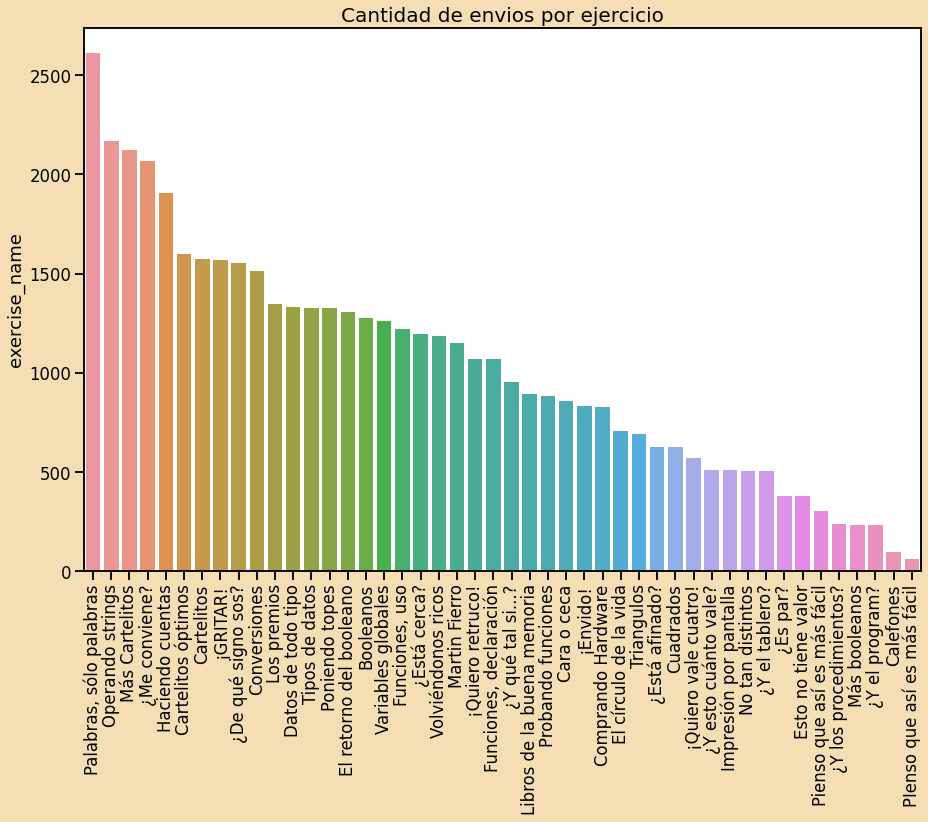

In [12]:
matplotlib.pyplot.figure(figsize = [15, 10] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
ax= seaborn.barplot(y=df_mumuki['exercise_name'].value_counts(), x=df_mumuki['exercise_name'].value_counts().index, data=df_mumuki)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.set_ylabel('cant. envios')
ax.set_ylabel('exercise_name')
ax.set_title('Cantidad de envios por ejercicio', fontsize=20)
plt.show()

Este gráfico fue ordenado de acuerdo a la cantidad de ejercicio, para conocer cual es el ejercicio con más y menos envios. 

### 2.1.1 Creacion columna 'exercise_id' que represente el orden de los ejercicios



Actualmente, exercise_eid no representa el orden de los ejercicios, sino mas bien se usa para identificarlos

En proximos analisis, sería de ayuda tener una columna que represente en que parte del curso se encuentra ese ejercicio enviado

Para evitar confusiones, y viendo que exercise_id no generará nueva informacion, se decide sacarla

In [13]:
#traemos csv con  los nuevos nombres
#url_new_names='https://raw.githubusercontent.com/laraccano84/Mentoria_mumuki/main/DiploDatos_Mentoria_Mumiki_G2/dataset_mumuki_new_exercises_names.csv'
#df_mumuki_new_names=pd.read_csv(url_new_names)

In [14]:
#df_mumuki_new_names=df_mumuki_new_names.drop(columns=['Unnamed: 0','exercise_eid'])

In [15]:
#urls a las que haremos la petición
url_lesson_1 = 'https://bibliotheca-api.mumuki.io/guides/mumukiproject/mumuki-guia-python-funciones-tipos-de-datos'
url_lesson_2 = 'https://bibliotheca-api.mumuki.io/guides/mumukiproject/mumuki-guia-python-practica-funciones-y-tipos-de-datos'
url_lesson_3 = 'https://bibliotheca-api.mumuki.io/guides/mumukiproject/mumuki-guia-python-variables-y-procedimientos'

#hacemos get request y guardamos en una variable
data_lesson_1 = requests.get(url_lesson_1)
data_lesson_2 = requests.get(url_lesson_2)
data_lesson_3 = requests.get(url_lesson_3)

#transformamos a json para poder manipularla
available_data_lesson_1 = data_lesson_1.json()
available_data_lesson_2 = data_lesson_2.json()
available_data_lesson_3 = data_lesson_3.json()

#esta request nos brinda muchisima información
#pero solo queremos el indice y el nombre
#guardamos en un array, para cada leccion, el indice y nombre del json de ejercicios pedido
exercises_lesson_1=[ {"index":ind, "name":elem['name']} for ind,elem in enumerate(available_data_lesson_1['exercises'])]
exercises_lesson_2=[ {"index":ind, "name":elem['name']} for ind,elem in enumerate(available_data_lesson_2['exercises'])]
exercises_lesson_3=[ {"index":ind, "name":elem['name']} for ind,elem in enumerate(available_data_lesson_3['exercises'])]

In [16]:
exercises_lesson_1

[{'index': 0, 'name': 'No tan distintos'},
 {'index': 1, 'name': 'Funciones, declaración'},
 {'index': 2, 'name': 'Funciones, uso'},
 {'index': 3, 'name': 'Probando funciones'},
 {'index': 4, 'name': 'Haciendo cuentas'},
 {'index': 5, 'name': 'Poniendo topes'},
 {'index': 6, 'name': 'Libros de la buena memoria'},
 {'index': 7, 'name': 'Booleanos'},
 {'index': 8, 'name': 'Palabras, sólo palabras'},
 {'index': 9, 'name': 'Operando strings'},
 {'index': 10, 'name': '¡GRITAR!'},
 {'index': 11, 'name': '¿Y qué tal si...?'},
 {'index': 12, 'name': '¿De qué signo sos?'},
 {'index': 13, 'name': 'El retorno del booleano'},
 {'index': 14, 'name': 'Los premios'},
 {'index': 15, 'name': 'Tipos de datos'},
 {'index': 16, 'name': 'Datos de todo tipo'}]

En el punto anterior habiamos reemplazado 

* Funciones, declaración por Funciones, declaración / No tan distintos. 
* Tipos de datos Y Datos de todo tipo por 'Tipos de datos / Datos de todo tipo'
* Poniendo topes por Calefones / Poniendo topes



Lo hacemos ahora en nuestro array construido que usaremos como guía

In [17]:
exercises_lesson_1[0]['name']='Funciones, declaración / No tan distintos'
exercises_lesson_1[1]['name']='Funciones, declaración / No tan distintos'
exercises_lesson_1[15]['name']='Tipos de datos / Datos de todo tipo'
exercises_lesson_1[5]['name']='Calefones / Poniendo topes'
exercises_lesson_1.pop()
exercises_lesson_1.pop(0)

exercises_lesson_1

[{'index': 1, 'name': 'Funciones, declaración / No tan distintos'},
 {'index': 2, 'name': 'Funciones, uso'},
 {'index': 3, 'name': 'Probando funciones'},
 {'index': 4, 'name': 'Haciendo cuentas'},
 {'index': 5, 'name': 'Calefones / Poniendo topes'},
 {'index': 6, 'name': 'Libros de la buena memoria'},
 {'index': 7, 'name': 'Booleanos'},
 {'index': 8, 'name': 'Palabras, sólo palabras'},
 {'index': 9, 'name': 'Operando strings'},
 {'index': 10, 'name': '¡GRITAR!'},
 {'index': 11, 'name': '¿Y qué tal si...?'},
 {'index': 12, 'name': '¿De qué signo sos?'},
 {'index': 13, 'name': 'El retorno del booleano'},
 {'index': 14, 'name': 'Los premios'},
 {'index': 15, 'name': 'Tipos de datos / Datos de todo tipo'}]

In [18]:
exercises_lesson_2

[{'index': 0, 'name': 'Comprando Hardware'},
 {'index': 1, 'name': '¿Me conviene?'},
 {'index': 2, 'name': 'Triangulos'},
 {'index': 3, 'name': 'Cuadrados'},
 {'index': 4, 'name': '¿Está afinado?'},
 {'index': 5, 'name': '¿Está cerca?'},
 {'index': 6, 'name': 'Cartelitos'},
 {'index': 7, 'name': 'Más Cartelitos'},
 {'index': 8, 'name': 'Cartelitos óptimos'},
 {'index': 9, 'name': 'Cara o ceca'},
 {'index': 10, 'name': '¡Envido!'},
 {'index': 11, 'name': '¡Quiero retruco!'},
 {'index': 12, 'name': '¡Quiero vale cuatro!'}]

In [19]:
exercises_lesson_3

[{'index': 0, 'name': '¿Y el tablero?'},
 {'index': 1, 'name': 'Impresión por pantalla'},
 {'index': 2, 'name': 'Martin Fierro'},
 {'index': 3, 'name': '¿Y los procedimientos?'},
 {'index': 4, 'name': '¿Y el program?'},
 {'index': 5, 'name': 'Conversiones'},
 {'index': 6, 'name': 'El círculo de la vida'},
 {'index': 7, 'name': 'Pienso que así es más fácil'},
 {'index': 8, 'name': 'Esto no tiene valor'},
 {'index': 9, 'name': 'Variables globales'},
 {'index': 10, 'name': 'Volviéndonos ricos'},
 {'index': 11, 'name': '¿Y esto cuánto vale?'}]

Ahora generaremos columnas auxiliares para ayudarnos a calcular el orden según la lección del ejercicio

In [20]:
#funcion que toma el guide_slug y devuelve un int que representa el nro de leccion
def set_lesson(repo):
    if repo=='mumukiproject/mumuki-guia-python-funciones-tipos-de-datos':
    # es repo_y_ejercicios[0]
      return 1
    elif repo == 'mumukiproject/mumuki-guia-python-practica-funciones-y-tipos-de-datos':
      return 2
    elif repo == 'mumukiproject/mumuki-guia-python-variables-y-procedimientos':
      return 3
    else:
      return {'Exercise not found'}

In [21]:
#creacion de la columna auxiliar
#df_mumuki_new_names['lesson_number']=df_mumuki_new_names.apply(lambda x: set_lesson( x.guide_slug), axis=1)
#df_mumuki_new_names.sample(5)

In [22]:
#funcion que de define el index del ejercicio dentro de la lección
def set_exercise_index_per_lesson(row):
  if row['guide_slug']=='mumukiproject/mumuki-guia-python-funciones-tipos-de-datos':
    for x in exercises_lesson_1:
      if x['name']==row['exercise_name']:
        return math.floor(x['index'])
  elif row['guide_slug']=='mumukiproject/mumuki-guia-python-practica-funciones-y-tipos-de-datos':
    for x in exercises_lesson_2:
      if x['name']==row['exercise_name']:
        return  math.floor(x['index'])
  elif row['guide_slug']=='mumukiproject/mumuki-guia-python-variables-y-procedimientos':
    for x in exercises_lesson_3:
      if x['name']==row['exercise_name']:
        return math.floor(x['index'])
  else:
    return 0

In [23]:
'''
df_mumuki_new_names['exercise_index_per_lesson']=df_mumuki_new_names.apply(lambda x: set_exercise_index_per_lesson(x), axis=1)
df_mumuki_new_names.sample(5)
'''

"\ndf_mumuki_new_names['exercise_index_per_lesson']=df_mumuki_new_names.apply(lambda x: set_exercise_index_per_lesson(x), axis=1)\ndf_mumuki_new_names.sample(5)\n"

In [24]:
#funcion que, tomando las columnas auxiliares, calcula el indice del ejercicio gral total
def set_excercise_id(index_per_lesson,lesson_number):
  if lesson_number==3:
    return index_per_lesson+len(exercises_lesson_1)+len(exercises_lesson_2)+1
  elif lesson_number==2:
    return index_per_lesson+ len(exercises_lesson_1)+1
  else:
    return index_per_lesson

In [25]:
#df_mumuki_new_names['exercise_id']=df_mumuki_new_names.apply(lambda x: set_excercise_id(x.exercise_index_per_lesson,x.lesson_number), axis=1)
#df_mumuki_new_names.sample(5)

Vemos como quedó entonces en la siguiente tabla donde agrupamos cada id de exercicio creado con su nombre correspondiente.

In [26]:
#df_mumuki_new_names.groupby('exercise_id', as_index=True).agg({'exercise_name':'unique'}).reset_index()

Como podemos ver, en ningún momento se 'pisan' los indices, y corrresponden a los indices de los datos pedidos a la API de mumuki y según el análisis previo de nombres.

## 2.2 `submission_status`: Cantidad de ejercicios por status

¿Qué tipo de datos nos encontramos en esta columna?

In [27]:
df_mumuki["submission_status"].describe()

count      47183
unique         6
top       failed
freq       17609
Name: submission_status, dtype: object

Ésta es una variable categórica no ordinal. Que tiene 6 valores únicos de status, no existen valores nulos y el de mayor frecuencia es el estado failed.

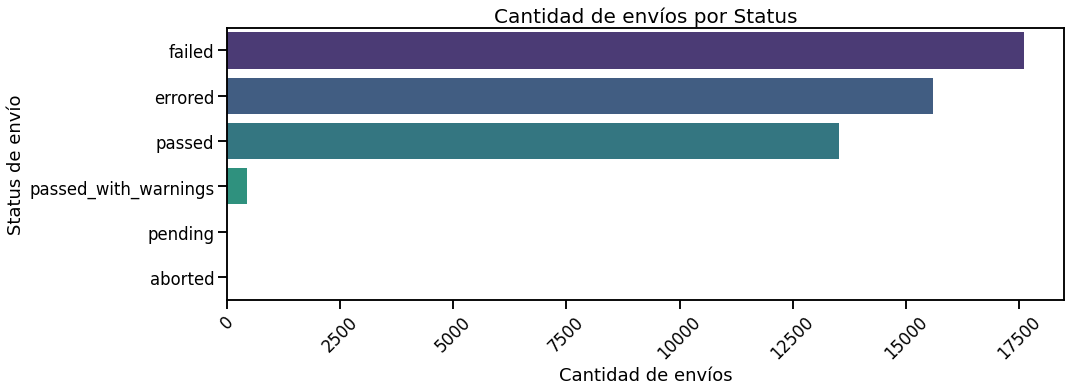

In [28]:
ejercicios_status=df_mumuki['submission_status'].value_counts().index.tolist()
fig = plt.figure(figsize=(15,5))
g= seaborn.barplot(y=df_mumuki['submission_status'].value_counts().index, x= df_mumuki['submission_status'].value_counts().values, palette="viridis")
plt.xticks(rotation=45)

g.set_xlabel('Cantidad de envíos')
g.set_ylabel('Status de envío')
g.set_title('Cantidad de envíos por Status', fontsize=20)
plt.show()

Nos encontramos con diferentes estados de 'no pasar el test', según la circunstancia. 
Investigando más sobre el significado de algunas categorías, 'pending' y 'aborted' son errores relacionadas a la plataforma en sí, y debido a la poca cantidad de envíos con estos estados y su poca utilidad para poder estudiar la temátoca de la deserción, se define eliminar estos casos.


In [29]:
#Comprobamos que la cantida de filas se mantenga consistente antes de eliminarlas del dataframe
interesting_status=['failed','passed','errored','passed_with_warnings']

print('Cantidad de filas esperadas después de eliminar las categorías "pending" y "aborted": ',len(df_mumuki)- len(df_mumuki[(df_mumuki['submission_status'] == 'pending')]) - len(df_mumuki[(df_mumuki['submission_status'] == 'aborted')])   ) 
print('Cantidad de filas después del filtrado: ', len(df_mumuki[df_mumuki['submission_status'].isin(interesting_status)]))

Cantidad de filas esperadas después de eliminar las categorías "pending" y "aborted":  47171
Cantidad de filas después del filtrado:  47171


In [30]:
df_mumuki = df_mumuki[df_mumuki['submission_status'].isin(interesting_status)]

Al seguir discutiendo sobre ésta columna, decidimos que lo que nos importa verdaderamente, es si pasó el ejercicio o no. De aquí se decide luego reagrupar en menos categorías el estado del ejercicio.

In [31]:
df_mumuki["Estatus"] = df_mumuki["submission_status"].replace({"failed": "no_paso", "passed": "paso", "errored": "no_paso", "passed_with_warnings": "no_paso"})

Visualizamos como nos quedan los status de acuerdo a los cambios.

In [32]:
df_mumuki["Estatus"].value_counts()

no_paso    33652
paso       13519
Name: Estatus, dtype: int64

Decidimos dejar el campo original para luego realizar análisis de los tipos de casos con Estatus no_paso.

## 2.3 `sid`

Ésta es una variable numérica, un identificador único del envío. Si el valor es igual a -1 el envío fue una prueba a través del REPL de Mumuki.

In [33]:
df_mumuki['sid'].value_counts()

-1        5508
 38200       1
 9550        1
 15693       1
 13644       1
          ... 
 25241       1
 27288       1
 4759        1
 6806        1
 0           1
Name: sid, Length: 41664, dtype: int64

In [34]:
len(df_mumuki)

47171

In [35]:
print(f"Hay {len(df_mumuki[df_mumuki['sid']==-1])} envíos que fueron mediante REPL, el {round(len(df_mumuki[df_mumuki['sid']==-1])/len(df_mumuki)*100,2)}% del total. El {len(df_mumuki)-len(df_mumuki[df_mumuki['sid']==-1])} son identificadores unicos de los envíos.") 

Hay 5508 envíos que fueron mediante REPL, el 11.68% del total. El 41663 son identificadores unicos de los envíos.


## 2.4 `expectation_results`

Esta variable resultada del análisis de expectativas y code smells realizado mediante la herramienta mulang

In [36]:
df_mumuki.groupby('expectation_results').size()

expectation_results
[]                                                                                                                                                                                        30320
[{'binding': '*', 'inspection': 'Declares:=cuanto_cuesta', 'result': 'failed'}, {'binding': 'cuanto_cuenta', 'inspection': 'HasDeclarationTypos:cuanto_cuesta', 'result': 'failed'}]          1
[{'binding': '*', 'inspection': 'Declares:=cuanto_cuesta', 'result': 'failed'}, {'binding': 'cuanto_cuestas', 'inspection': 'HasDeclarationTypos:cuanto_cuesta', 'result': 'failed'}]         3
[{'binding': '*', 'inspection': 'Declares:=cuanto_cuesta', 'result': 'failed'}, {'binding': 'cuento_cuesta', 'inspection': 'HasDeclarationTypos:cuanto_cuesta', 'result': 'failed'}]          3
[{'binding': '*', 'inspection': 'Declares:=cuanto_cuesta', 'result': 'failed'}]                                                                                                              23
                    

Podemos ver que la mayoria de las veces espera un valor vacio, pero necesitaríamos más tiempo para analizar y entender mejor esta variable

## 2.5 `feedback`

¿Feedback de qué trata esta columna?

In [37]:
df_mumuki['feedback'].value_counts(dropna=False)

NaN    47171
Name: feedback, dtype: int64

La columna siempre tiene un valor vacío. Al no tener información, es buena candidata para eliminarla del dataset

In [38]:
df_mumuki=df_mumuki.drop(['feedback'], axis=1)

## 2.6 `guide_slug`

Esta variable es un identificador único de la guía, y nos ayudó a buscar los repositorios

In [39]:
df_mumuki['guide_slug'].value_counts(dropna=False)

mumukiproject/mumuki-guia-python-funciones-tipos-de-datos               23958
mumukiproject/mumuki-guia-python-practica-funciones-y-tipos-de-datos    14660
mumukiproject/mumuki-guia-python-variables-y-procedimientos              8553
Name: guide_slug, dtype: int64

Es una variable categórica y no hay valores nulos

De todos los envíos, la mayoría son submissions son a la primera guía, `mumukiproject/mumuki-guia-python-funciones-tipos-de-datos`. 

## 2.7 `result`

Representa el resultado obtenido al intentar cargar la solución en un intérprete de Python.

In [40]:
df_mumuki.groupby('result').size()

result
\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

Podemos detectar que es una variable con información de los envíos, la cual puede tener valores nulos. Al principio parece que son todos distintos, pero tiene información la cual parece que es la misma respuesta.
Se va a análizar en detalle más adelante.

## 2.8 `submission_content`

Es el código fuente de la solución enviada.

In [41]:
df_mumuki['submission_content'].value_counts()

0:3:4                                                                                                                                                                                                                                      252
3                                                                                                                                                                                                                                          204
0:1:3:4:6:7                                                                                                                                                                                                                                179
0:1:3:6:7                                                                                                                                                                                                                                  151
0                                           

Nos llamó la atención la aparición de valores como `0:3:4` o `0:1:3:4:6:7`, que no son strings ni representan una solución a un ejercicio de programación.

Éstos valores significan que el ejercicio era teórico y de múltiple opción, y separados por dos puntos, son las opciones enviadas.

Variable que tiene puede tener nulos, que podemos detectar si fue un ejercicio o de múltiple opciones.

## 2.9 `submission_created_at`

Es la fecha y hora GMT a la que la solución fue enviada

¿Durante qué período se enviaron las soluciones? 

In [42]:
print(f"El período que se enviaron las soluciones es desde: {df_mumuki['submission_created_at'].min()}  hasta: {df_mumuki['submission_created_at'].max()}")

El período que se enviaron las soluciones es desde: 2019-08-30 13:17:17.700  hasta: 2020-11-23 21:52:17.944


In [43]:
df_mumuki.groupby('submission_created_at').size()

submission_created_at
2019-08-30 13:17:17.700    1
2019-08-30 13:40:26.023    1
2019-09-04 01:29:22.351    1
2019-09-04 01:32:42.763    1
2019-09-04 01:34:52.318    1
                          ..
2020-11-23 21:46:39.531    1
2020-11-23 21:46:55.629    1
2020-11-23 21:50:56.250    1
2020-11-23 21:51:58.312    1
2020-11-23 21:52:17.944    1
Length: 47163, dtype: int64

Este es un valor int64. 

Es una variable de fecha y hora, que se puede analizar separandolo para una mayor comodidad. Por lo tanto en esta sección vamos a tranformar el campo y mantener el original por si necesitamos trabajar con la variable tal cual esta.

In [44]:
df_mumuki['Date']= pd.to_datetime(df_mumuki['submission_created_at']).dt.date
len(df_mumuki['Date'].value_counts())

198

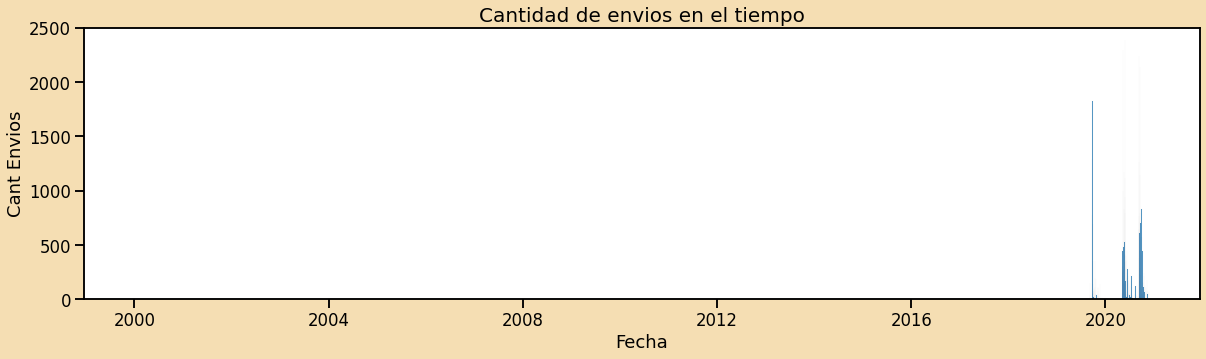

In [45]:
matplotlib.pyplot.figure(figsize = [20, 5] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
ti = seaborn.histplot(data=df_mumuki, x=df_mumuki['Date'])

ti.set_xlabel('Fecha')
ti.set_ylabel('Cant Envios')
ti.set_title('Cantidad de envios en el tiempo', fontsize=20)
plt.show()

Los envíos se realizaron en 198 días diferentes.

Podemos observar que los ejercicios fueron enviados por los estudiantes en en 3 periodos principales:

2019-10 al 2019-12

2020-05 al 2020-07

2020-09 al 2020-11

Hay un periodo, de principio de enero 2020 a abril 2020, sin información.

Nos preguntamos, cuáles son las fechas con más envíos?

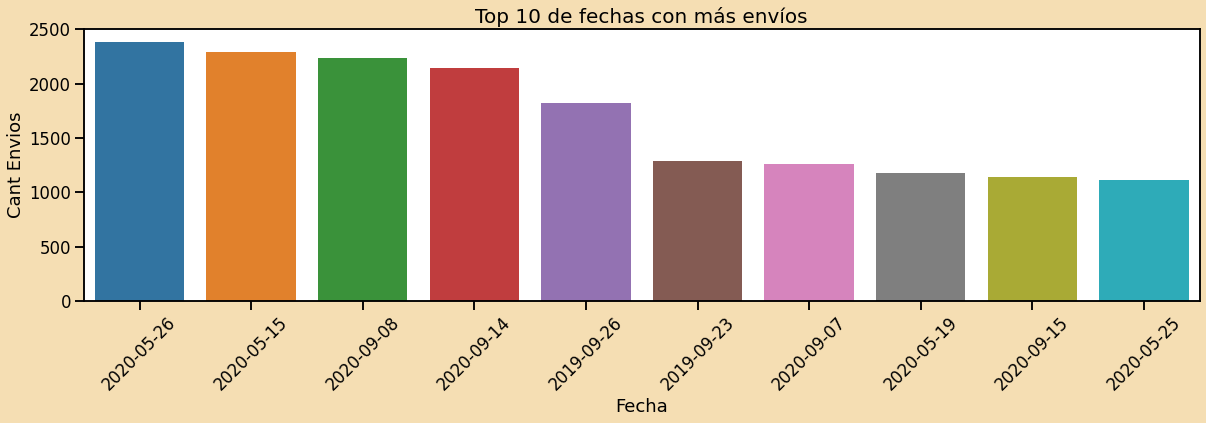

In [46]:
matplotlib.pyplot.figure(figsize = [20, 5] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
ax = seaborn.barplot(y=df_mumuki['Date'].value_counts()[:10], x=df_mumuki['Date'].value_counts()[:10].index, data=df_mumuki)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

ax.set_xlabel('Fecha')
ax.set_ylabel('Cant Envios')
ax.set_title('Top 10 de fechas con más envíos', fontsize=20)
plt.show()

Vemos que la mayoria de los envíos son en año 2020, y en los meses de mayo y septiembre, que está relacionado a que los cursos son cuatrimestrales.

Ésta columna nos produjo varias preguntas para seguir analizando las fechas, que serán discutidas más adelante. Por lo cual se decidio crear, como año, mes, periodo, tiempo, hora, minuto, número de semana, día de la semana, para un mejor análisis.

In [47]:
df_mumuki['Periodo'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.to_period("M")
df_mumuki['Year'] = pd.DatetimeIndex(df_mumuki['submission_created_at']).year
df_mumuki['Month'] = pd.DatetimeIndex(df_mumuki['submission_created_at']).month
df_mumuki['Week'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.isocalendar().week
df_mumuki['DayNroWeek'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.weekday
df_mumuki['DayNameWeek'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.day_name()

df_mumuki['Time']= pd.to_datetime(df_mumuki['submission_created_at']).dt.time
df_mumuki['Hora'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.hour
df_mumuki['Minute'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.minute

Visualizamos las columnas agregadas

In [48]:
df_mumuki[['submission_created_at','Date','Periodo','Year','Month','Week','DayNroWeek','DayNameWeek','Time','Hora','Minute']]

,submission_created_at,Date,Periodo,Year,Month,Week,DayNroWeek,DayNameWeek,Time,Hora,Minute
0,2019-08-30 13:17:17.700,2019-08-30,2019-08,2019,8,35,4,Friday,13:17:17.700000,13,17
1,2019-09-04 01:29:22.351,2019-09-04,2019-09,2019,9,36,2,Wednesday,01:29:22.351000,1,29
2,2019-09-04 02:53:01.099,2019-09-04,2019-09,2019,9,36,2,Wednesday,02:53:01.099000,2,53
3,2019-09-04 02:53:24.673,2019-09-04,2019-09,2019,9,36,2,Wednesday,02:53:24.673000,2,53
4,2019-09-04 02:53:41.949,2019-09-04,2019-09,2019,9,36,2,Wednesday,02:53:41.949000,2,53
...,...,...,...,...,...,...,...,...,...,...,...
47178,2020-11-08 22:03:56.946,2020-11-08,2020-11,2020,11,45,6,Sunday,22:03:56.946000,22,3
47179,2020-11-12 11:10:08.054,2020-11-12,2020-11,2020,11,46,3,Thursday,11:10:08.054000,11,10
47180,2020-11-12 13:56:29.344,2020-11-12,2020-11,2020,11,46,3,Thursday,13:56:29.344000,13,56
47181,2020-11-16 18:22:54.768,2020-11-16,2020-11,2020,11,47,0,Monday,18:22:54.768000,18,22


¿En qué dias de la semana se enviaron?

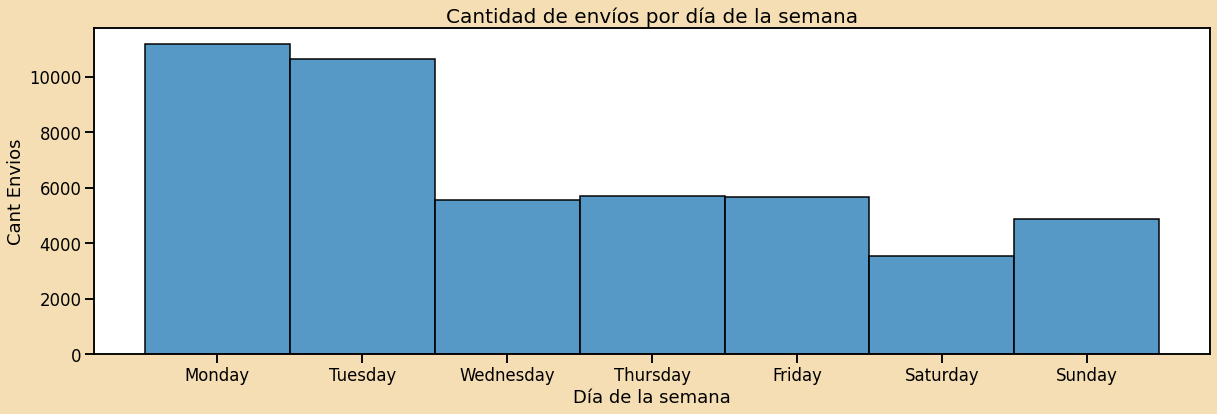

In [49]:
orderDiaSemana = df_mumuki.sort_values('DayNroWeek')
matplotlib.pyplot.figure(figsize = [20, 6] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
ax=seaborn.histplot( x=orderDiaSemana['DayNameWeek'],data=orderDiaSemana)
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Cant Envios')
ax.set_title('Cantidad de envíos por día de la semana', fontsize=20)
plt.show()

El día de la semana que más ejercicios se envían son el Lunes y Martes. El Sábado es el día de la semana que menos ejercicios presentan.

## 2.10 `student_uid`

Es el identificador (anonimizado) de estudiante.

Nos preguntamos cuántas personas tenemos en nuestro dataset? 

In [50]:
print(f"La cantidad de estudiante que tiene el data set es: {len(df_mumuki['student_uid'].unique())}") 

La cantidad de estudiante que tiene el data set es: 286


In [51]:
print(f"Existen vacíos en los id de estudiantes?: {df_mumuki.student_uid.isnull().values.any()}") 

Existen vacíos en los id de estudiantes?: False


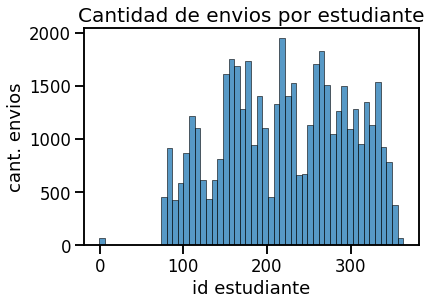

In [52]:
ax = seaborn.histplot(data=df_mumuki, x='student_uid')

ax.set_ylabel('cant. envios')
ax.set_xlabel('id estudiante')
ax.set_title('Cantidad de envios por estudiante', fontsize=20)
plt.show()

In [53]:
df_mumuki['student_uid'].min()

-1

En la gráfica, detectamos separacion de seguimiento identificacion de estudiantes, por la cual verificamos cual es el identificardor minimo y detectamos que el valor es igual a -1.

In [54]:
print(f"La cantidad de envios que tiene el estudiante identificado con -1 es: {len(df_mumuki[df_mumuki['student_uid']==-1])}")  

La cantidad de envios que tiene el estudiante identificado con -1 es: 72


Al no identificar si es un estudiante o varios, si es un error del dataset o no, se definio no tener en cuenta la información de los registro con 'student_uid' igual a -1. Por lo tanto se eliminara los registros.

In [55]:
df_mumuki_sin_uid_1 = df_mumuki[df_mumuki['student_uid']!=-1]

Se valida que se eliminaron los registros

In [56]:
print(f"La cantidad de envios que tiene el estudiante identificado con -1 es: {len(df_mumuki_sin_uid_1[df_mumuki_sin_uid_1['student_uid']==-1])}")  

La cantidad de envios que tiene el estudiante identificado con -1 es: 0


# 3. Preguntas realizadas durante la exploración del Dataset

## 3.1 ¿Cuántos envíos se realizaron por user?

In [57]:
df_mumuki_sin_uid_1.groupby(['student_uid']).agg({'exercise_name':'count'})

,exercise_name
student_uid,
75,1
76,89
77,186
78,84
79,95
...,...
358,6
359,38
361,1


## 3.2 ¿Cuántas personas aprobaron aunque sea un ejercicio que han enviado?

Agrupamos por usuarix, y por estado de envío, de acuerdo a la reagrupación de paso y no_paso.

In [58]:
users_por_status=df_mumuki_sin_uid_1.groupby('student_uid').Estatus.value_counts() \
.unstack(fill_value=0).reset_index()

In [59]:
print(f"La cantidad de personas que aprobaron aunque sea un ejercicio son: {len(users_por_status[users_por_status['paso']>0])}")   

La cantidad de personas que aprobaron aunque sea un ejercicio son: 279


## 3.3 ¿Cuántas personas desaprobaron aunque sea un ejercicio que han enviado?

In [60]:
print(f"La cantidad de personas que desaprobaron aunque sea un ejercicio son: {len(users_por_status[users_por_status['no_paso']>0])}") 

La cantidad de personas que desaprobaron aunque sea un ejercicio son: 284


Hay más usuarixs que realizaron envíos que no pasaron la prueba que los que pasaron. Es decir, hay personas dentro del dataset que todos sus envíos fueron desaprobados.

## 3.4 ¿Cuántas personas no aprobaron ningun ejercicio?

In [61]:
print(f"En el dataset, {len(users_por_status[users_por_status['paso']==0])} estudiantes hicieron envíos que sólo desaprobaron.")  

En el dataset, 6 estudiantes hicieron envíos que sólo desaprobaron.


## 3.5  ¿Cuántas personas aprobaron todos los ejercicios que enviaron?

In [62]:
print(f"En el dataset, {len(users_por_status[users_por_status['no_paso']==0])} estudiante/s aprobo todos los envíos que realizó.")  

En el dataset, 1 estudiante/s aprobo todos los envíos que realizó.


## 3.6 ¿Cuáles son los ejercicios con más envíos?

In [63]:
nombre_ejercicios_con_mas_ocurrencias=df_mumuki_sin_uid_1['exercise_name'].value_counts().index.tolist()[:10]
df_ejercicios_con_mas_ocurrencias=df_mumuki_sin_uid_1[df_mumuki_sin_uid_1['exercise_name'].isin(nombre_ejercicios_con_mas_ocurrencias)]

Text(0.5, 1.0, 'Top 10 de cantidad de envíos por nombre de ejercicios')

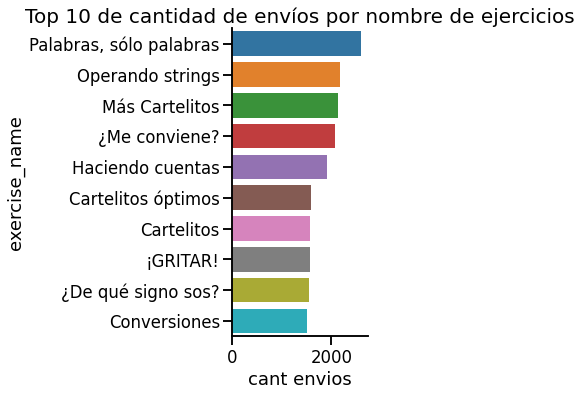

In [64]:
seaborn.catplot(
    data=df_ejercicios_con_mas_ocurrencias, 
    y=df_ejercicios_con_mas_ocurrencias['exercise_name'].value_counts().index,  
    x=df_ejercicios_con_mas_ocurrencias['exercise_name'].value_counts().values,
    kind='bar')
plt.xlabel('cant envios')
plt.ylabel('exercise_name')
plt.title('Top 10 de cantidad de envíos por nombre de ejercicios', fontsize=20)

**Modificaciones al dataSet:**

En esta notebook se crearon columnas para un mejor análisis. Se crearon las siguientes columnas para datos de tiempo: año, mes, periodo, numero de semana del año, numero y dia de la semana, separo el tiempo, hora, minuto.

Se creo una funcion para asignar dos categorias de resultados: Paso y no paso. 

Y se unifico nombres de los siguientes ejercicios. La explicación de la unificación de nombres estan en la notebok con el nombre: '00_Cambio_de_nombres_de_ejercicios'

In [65]:
df_mumuki_sin_uid_1['exercise_name'] = df_mumuki_sin_uid_1['exercise_name'].replace(
      {'PIenso que así es más fácil':'Pienso que así es más fácil', 
       '¿Es par?':'Libros de la buena memoria', 
       'Más booleanos' :'El retorno del booleano'
       })

In [66]:
df_mumuki_sin_uid_1['exercise_name'] = df_mumuki_sin_uid_1['exercise_name'].replace(
      {'Funciones, declaración': 'Funciones, declaración / No tan distintos',
       'No tan distintos': 'Funciones, declaración / No tan distintos' })

In [67]:
df_mumuki_sin_uid_1['exercise_name'] = df_mumuki_sin_uid_1['exercise_name'].replace(
      {'Calefones': 'Calefones / Poniendo topes',
       'Poniendo topes': 'Calefones / Poniendo topes'})

In [68]:
df_mumuki_sin_uid_1['exercise_name'] = df_mumuki_sin_uid_1['exercise_name'].replace(
      {'Datos de todo tipo': 'Tipos de datos / Datos de todo tipo',
       'Tipos de datos': 'Tipos de datos / Datos de todo tipo'})

Ahora se realizan los mismos pasos que ya fueron descriptos en detalle en la sección 2.1.1

In [69]:
df_mumuki_sin_uid_1['lesson_number']=df_mumuki_sin_uid_1.apply(lambda x: set_lesson( x.guide_slug), axis=1)

In [70]:
df_mumuki_sin_uid_1['exercise_index_per_lesson']=df_mumuki_sin_uid_1.apply(lambda x: set_exercise_index_per_lesson(x), axis=1)

In [71]:
df_mumuki_sin_uid_1['id_exercise']=df_mumuki_sin_uid_1.apply(lambda x: set_excercise_id(x.exercise_index_per_lesson,x.lesson_number), axis=1)

In [72]:
df_mumuki_sin_uid_1=df_mumuki_sin_uid_1.drop(columns=['exercise_eid'])

Se visualiza como queda el dataSet con los cambios

In [73]:
df_mumuki_sin_uid_1.sample(3)

,exercise_name,expectation_results,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,Estatus,Date,Periodo,Year,Month,Week,DayNroWeek,DayNameWeek,Time,Hora,Minute,lesson_number,exercise_index_per_lesson,id_exercise
29336,Cartelitos,[],mumukiproject/mumuki-guia-python-practica-func...,NaN,25228,215,"def escribir_cartelito(tirulo,nombre,apellido)...",2020-05-24 04:14:06.419,failed,11,[{'title': 'Escribir cartelito dr julio gelman...,no_paso,2020-05-24,2020-05,2020,5,21,6,Sunday,04:14:06.419000,4,14,2,6,22
31597,Más Cartelitos,"[{'binding': 'escribir_cartelito', 'inspection...",mumukiproject/mumuki-guia-python-practica-func...,NaN,27491,252,# modificá esta función\r\ndef escribir_cartel...,2020-08-09 21:39:42.506,passed_with_warnings,27,[{'title': 'Escribir cartelito dr julio gelman...,no_paso,2020-08-09,2020-08,2020,8,32,6,Sunday,21:39:42.506000,21,39,2,7,23
4068,Libros de la buena memoria,"[{'binding': '*', 'inspection': 'Declares:le_g...",mumukiproject/mumuki-guia-python-funciones-tip...,NaN,4068,170,"def le_gusta_leer(true, false):\r\n return le...",2020-05-13 22:35:48.660,failed,11,"[{'title': 'Le gusta leer 15 es falso', 'statu...",no_paso,2020-05-13,2020-05,2020,5,20,2,Wednesday,22:35:48.660000,22,35,1,6,6


#### Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas.

In [74]:
df_mumuki_sin_uid_1.to_csv('DataSet_Mumuki_Transformed.csv')

***iiii***